# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

In [17]:
city_data =[]
rcd = 0
sets = 1
print('\nBeginning Data Retrieval\n-----------------------------\n')

for city in cities:
    rcd += 1 
    print(f'Processing Record {rcd} of Set {sets} | {city}')
    
    if rcd == 50:
        sets+=1
        rcd = 0
      
    url= f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}&q={city}"
    res = requests.get(url).json()
    
    try:
        city_data.append({
            'City': city,
            'Lat': res['coord']['lat'],
            'Lng': res['coord']['lon'],
            'Temp': res['main']['temp_max'],
            'Humidity': res['main']['humidity'],
            'Cloudiness': res['clouds']['all'],
            'Wind Speed': res['wind']['speed'],
            'Country': res['sys']['country'],
            'Date': res['dt']
        })
    except:
        print('City not found. Skipping...')
        pass
    
print('\n-----------------------------\nData Retrieval Complete\n----------------------------')


Beginning Data Retrieval
-----------------------------

Processing Record 1 of Set 1 | fortuna
Processing Record 2 of Set 1 | caravelas
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | nikolskoye
Processing Record 5 of Set 1 | seoul
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | temaraia
City not found. Skipping...
Processing Record 8 of Set 1 | fare
Processing Record 9 of Set 1 | darhan
Processing Record 10 of Set 1 | geresk
City not found. Skipping...
Processing Record 11 of Set 1 | carnarvon
Processing Record 12 of Set 1 | saint-joseph
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | inderborskiy
City not found. Skipping...
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | tahara
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 1 | magadan
Processing Record 20 of Set 1 | barentsburg
City not found. Skipping.

Processing Record 37 of Set 4 | port hardy
Processing Record 38 of Set 4 | namibe
Processing Record 39 of Set 4 | acapulco
Processing Record 40 of Set 4 | cabedelo
Processing Record 41 of Set 4 | acevedo
Processing Record 42 of Set 4 | paraiso
Processing Record 43 of Set 4 | kavieng
Processing Record 44 of Set 4 | sainte-maxime
Processing Record 45 of Set 4 | bathsheba
Processing Record 46 of Set 4 | souillac
Processing Record 47 of Set 4 | karratha
Processing Record 48 of Set 4 | svetlyy
Processing Record 49 of Set 4 | kiunga
Processing Record 50 of Set 4 | san cristobal
Processing Record 1 of Set 5 | kholodnyy
Processing Record 2 of Set 5 | okhotsk
Processing Record 3 of Set 5 | yerofey pavlovich
Processing Record 4 of Set 5 | carnot
Processing Record 5 of Set 5 | longonjo
Processing Record 6 of Set 5 | husavik
Processing Record 7 of Set 5 | mrakovo
Processing Record 8 of Set 5 | warren
Processing Record 9 of Set 5 | marshfield
Processing Record 10 of Set 5 | dwarka
Processing Record

Processing Record 31 of Set 8 | moree
Processing Record 32 of Set 8 | truckee
Processing Record 33 of Set 8 | sao joao da barra
Processing Record 34 of Set 8 | esso
Processing Record 35 of Set 8 | laguna
Processing Record 36 of Set 8 | churumuco
City not found. Skipping...
Processing Record 37 of Set 8 | san policarpo
Processing Record 38 of Set 8 | paradwip
City not found. Skipping...
Processing Record 39 of Set 8 | shirokiy
Processing Record 40 of Set 8 | brigantine
Processing Record 41 of Set 8 | iqaluit
Processing Record 42 of Set 8 | prince rupert
Processing Record 43 of Set 8 | khatanga
Processing Record 44 of Set 8 | touros
Processing Record 45 of Set 8 | sibolga
Processing Record 46 of Set 8 | ambilobe
Processing Record 47 of Set 8 | burgos
Processing Record 48 of Set 8 | kalemie
Processing Record 49 of Set 8 | riyadh
Processing Record 50 of Set 8 | vanimo
Processing Record 1 of Set 9 | urucurituba
Processing Record 2 of Set 9 | shuyskoye
Processing Record 3 of Set 9 | saldanha

Processing Record 18 of Set 12 | grants pass
Processing Record 19 of Set 12 | kropotkin
Processing Record 20 of Set 12 | port lincoln
Processing Record 21 of Set 12 | borogontsy
Processing Record 22 of Set 12 | dingzhou
Processing Record 23 of Set 12 | nome
Processing Record 24 of Set 12 | zhangjiakou
Processing Record 25 of Set 12 | castlebar
Processing Record 26 of Set 12 | san vicente
Processing Record 27 of Set 12 | teignmouth
Processing Record 28 of Set 12 | bereda
Processing Record 29 of Set 12 | eureka
Processing Record 30 of Set 12 | kapoeta
Processing Record 31 of Set 12 | zemio
Processing Record 32 of Set 12 | andarab
City not found. Skipping...
Processing Record 33 of Set 12 | devils lake
Processing Record 34 of Set 12 | murray bridge
Processing Record 35 of Set 12 | tukums
Processing Record 36 of Set 12 | timbiqui
Processing Record 37 of Set 12 | maldonado
Processing Record 38 of Set 12 | uruacu
Processing Record 39 of Set 12 | hambantota
Processing Record 40 of Set 12 | za

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
df = pd.DataFrame(city_data)
df.to_csv(output_data_file)
df.head()

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fortuna,40.5982,-124.1573,52.0,87,90,19.57,US,1612568167
1,caravelas,-17.7125,-39.2481,80.2,80,97,14.56,BR,1612568135
2,ushuaia,-54.8000,-68.3000,46.4,76,75,25.32,AR,1612568062
3,nikolskoye,59.7035,30.7861,12.0,78,75,11.18,RU,1612568167
4,seoul,37.5683,126.9778,39.2,81,75,6.91,KR,1612568164


In [23]:
## Inspect the data and remove the cities where the humidity > 100%.
df[df.Humidity>100]
#Skip this step if there are no cities that have humidity > 100%. 

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<AxesSubplot:title={'center':'City Latitiude vs. Max temperature'}, xlabel='Lat', ylabel='Temp'>

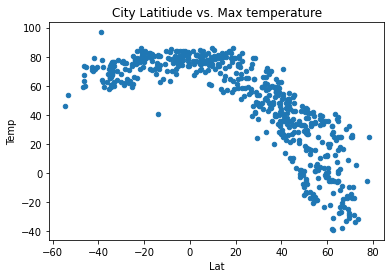

In [45]:
# df[['Lat','Temp']].plot(kind='scatter', \
#     x = 'Lat', y = 'Temp',title = f'City Latitiude vs. Max temperature {time.strftime('%x')}')

df[['Lat','Temp']].plot(kind='scatter', \
    x = 'Lat', y = 'Temp',title = f'City Latitiude vs. Max temperature')


## Latitude vs. Humidity Plot

<AxesSubplot:title={'center':'City Latitiude vs. Humidity'}, xlabel='Lat', ylabel='Humidity'>

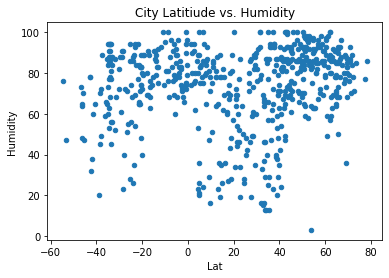

In [46]:

df[['Lat','Humidity']].plot(kind='scatter', \
    x = 'Lat', y = 'Humidity',title = f'City Latitiude vs. Humidity')


## Latitude vs. Cloudiness Plot

<AxesSubplot:title={'center':'City Latitiude vs. Cloudiness'}, xlabel='Lat', ylabel='Cloudiness'>

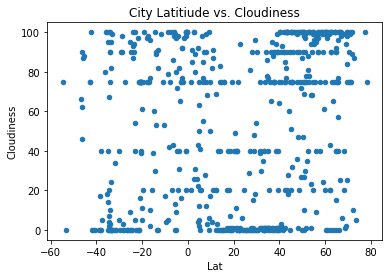

In [53]:

df[['Lat','Cloudiness']].plot(kind='scatter', \
    x = 'Lat', y = 'Cloudiness',title = f'City Latitiude vs. Cloudiness')


## Latitude vs. Wind Speed Plot

<AxesSubplot:title={'center':'City Latitiude vs. Wind Speed'}, xlabel='Lat', ylabel='Wind Speed'>

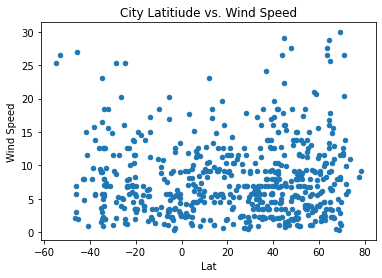

In [54]:

df[['Lat','Wind Speed']].plot(kind='scatter', \
    x = 'Lat', y = 'Wind Speed',title = f'City Latitiude vs. Wind Speed')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression